## Linnear Regression

### Feature Selection

In [1]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
%run -i ../../tools/label_encoder.py

# Estadisticos y Errores
# Metrics
The metric given for sklearn will be the metric taken into account.  
And added to that metric,  i am going to find:  

* SSD : Sum of the Square Diferences
* The Standard deviation RSE
* The Mean of the Target
* The error

Revisar el [Error estandar de la regresion](https://es.wikipedia.org/wiki/Error_est%C3%A1ndar)

In [30]:
def LR_Statistics(X, Y, Y_pred):
    """Estimate the SSD, Std deviation, the mean of the target and the Error"""
    SSD = np.sum((Y-Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    #SSD = Sum of Squared Differences
    #RSE o Std Deviation = Standard Deviation
    print('SSD :', SSD, 'RSE:', RSE, "Y's Mean:", y_mean, 'error:', error*100)

In [31]:
def get_exp_prediction(exp, D_sorted, c):
    """Required the exponent, the sorted data by values of the target, and the column that will be analyzed return the
    score of the model, statistics and the plots of the prediction"""
    y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
    X_list = D_sorted.columns.difference(y_list)
    New_X = D_sorted.filter(items = X_list)
    exped_X = New_X**exp
    Y_train = D_sorted.filter(items = y_list)
    Lm = LinearRegression()
    Lm.fit(exped_X, Y_train[c])
    print('The Model with the Data raised to the power of', exp, 'give:')
    print('Score:', Lm.score(exped_X, Y_train[c])*100)
    LR_Statistics(exped_X, Y_train[c], Lm.predict(exped_X))
    plot_predictions(Lm, c, exped_X, Y_train)

In [32]:
def get_Poly_prediction(deg, D_sorted, c):
    """Required the degree to the PolynomialFeature object and the sorted data by values of the target,
    return the score of the model, statistics and the plots of the prediction"""
    start_time = time()
    y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
    X_list = D_sorted.columns.difference(y_list)
    
    New_X = D_sorted.filter(items = X_list)
    Y_train = D_sorted.filter(items = y_list)
    
    Poly = PolynomialFeatures(degree = deg)
    Poly_X = Poly.fit_transform(New_X)
    
    Lm = LinearRegression()
    Lm.fit(Poly_X, Y_train[c])
    print('The Model with the new "PolyData" with degree', deg, 'gives:')
    print('Score:', Lm.score(Poly_X, Y_train[c])*100)
    LR_Statistics(Poly_X, Y_train[c], Lm.predict(Poly_X))
    plot_predictions(Lm, c, Poly_X, Y_train)
    del(Poly, Lm)
    print('The prediction took:', time()-start_time, 'seconds')

In [33]:
def plot_predictions(Model, c, X, Y):
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.plot(range(Y.shape[0]), Model.predict(X), 'bo')
    plt.plot(range(Y.shape[0]), Y[c], 'ro')
    plt.title('Prediction without an Order')
    plt.ylabel('Puntaje')
    plt.subplot(1,2,2)
    y_pred = Model.predict(X)
    y_pred.sort()
    plt.plot(range(Y.shape[0]), y_pred)
    plt.plot(range(Y.shape[0]), Y[c], 'ro')
    plt.title('Prediction Ordered')
    plt.ylabel('Puntaje')
    

### File of the year 2000

In [31]:
data_2000 = pd.read_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_1.csv', delimiter = ';')

In [35]:
data_2000.shape

(77508, 53)

In [36]:
data_2000 = label_encoder(data_2000)

In [37]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = data_2000.columns.difference(y_list)

In [38]:
X = data_2000.filter(items=X_list)
Y = data_2000.filter(items=y_list)

### TREATMENT OF THE MULTICOLLINEARITY

We can see that the SUBJECT's Scores are related to this other columns
* ['FAMI_INGRESO_FMILIAR_MENSUAL', 'FAMI_INGRESO_FMILIAR_MENSUAL', 'FAMI_EDUCA_PADRE', 'FAMI_EDUCA_PADRE']

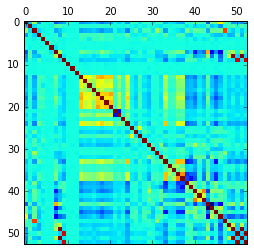

In [8]:
plt.matshow(data_2000.corr())

In [9]:
correl = data_2000.corr()

In [10]:
correl.iloc[33:37, 30:36]

,FAMI_VIVIENDA_PROPIA,FAMI_DEUDA_VIVIENDA,FAMI_APORTANTES,FAMI_INGRESO_FMILIAR_MENSUAL,FAMI_LEE_ESCRIBE_PADRE,FAMI_LEE_ESCRIBE_MADRE
FAMI_INGRESO_FMILIAR_MENSUAL,0.114591,0.044470,0.107332,1.000000,0.089675,0.097750
FAMI_LEE_ESCRIBE_PADRE,0.007864,0.000779,-0.009174,0.089675,1.000000,0.245365
FAMI_LEE_ESCRIBE_MADRE,0.011658,0.004436,-0.020339,0.097750,0.245365,1.000000
FAMI_EDUCA_PADRE,0.057892,0.078371,0.009244,0.525457,0.274445,0.144073


Here we can see the relations between the columns without the scores

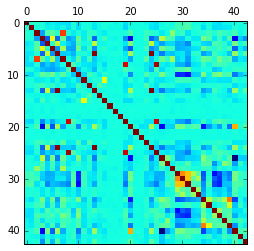

In [11]:
plt.matshow(X.corr())#, cmap='Greys_r')

In [19]:
correlation = X.corr()

In [27]:
#correlation.iloc[12:18, :6] #COLE_COD_ICFES y NACIMIENTO_ANNO
correlation.iloc[30:36, 23:29]

,FAMI_DEUDA_VIVIENDA,FAMI_EDUCA_MADRE,FAMI_EDUCA_PADRE,FAMI_INGRESO_FMILIAR_MENSUAL,FAMI_LEE_ESCRIBE_MADRE,FAMI_LEE_ESCRIBE_PADRE
FAMI_NUM_HERMANOS_EDUSUPERIOR,0.037494,0.014288,0.030979,0.080195,0.004785,0.009540
FAMI_OCUPA_MADRE,-0.055576,-0.386199,-0.250997,-0.300217,-0.065806,-0.045554
FAMI_OCUPA_PADRE,0.040984,-0.291794,-0.324735,-0.348265,-0.073053,-0.070925
FAMI_PERSONAS_HOGAR,-0.010773,-0.134019,-0.115506,-0.100899,-0.043043,-0.031921
FAMI_SOST_PERSONAL,-0.048561,0.181317,0.180975,0.105135,0.109918,0.097288
FAMI_VIVIENDA_PROPIA,-0.008218,0.074185,0.057892,0.114591,0.011658,0.007864


#### THIS CHANGES WILL BE EXECUTED IMMEDIATELY
* We see that there are correlations between the columns that has information about departments and municipalities, SO just one of each class will remain
* We see that there are correlations between the column COLE_JORNADA and COLE_BILINGUE, so COLE_JORNADA will remain, because COLE_BILINGUE had like more than 90% of NaN values, and was filled intuitively


In [39]:
data_2000.drop(['COLE_DEPTO_UBICACION', 'COLE_MCPIO_UBICACION', 'ESTU_DEPTO_PRESENTACION', 'ESTU_MCPIO_PRESENTACION',
                'COLE_BILINGUE', 'FAMI_POSICION_HERMANOS'], axis=1, inplace=True)

In [40]:
data_2000.to_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_1.csv', sep=';', index=False)

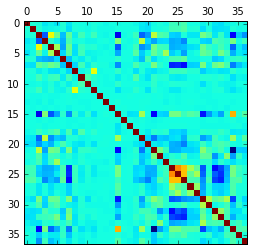

In [15]:
X = data_2000.filter(items=X_list)
Y = data_2000.filter(items=y_list)
plt.matshow(X.corr())#, cmap='Greys_r')

# Plots of the Targets

In [193]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = D_sorted.columns.difference(y_list)

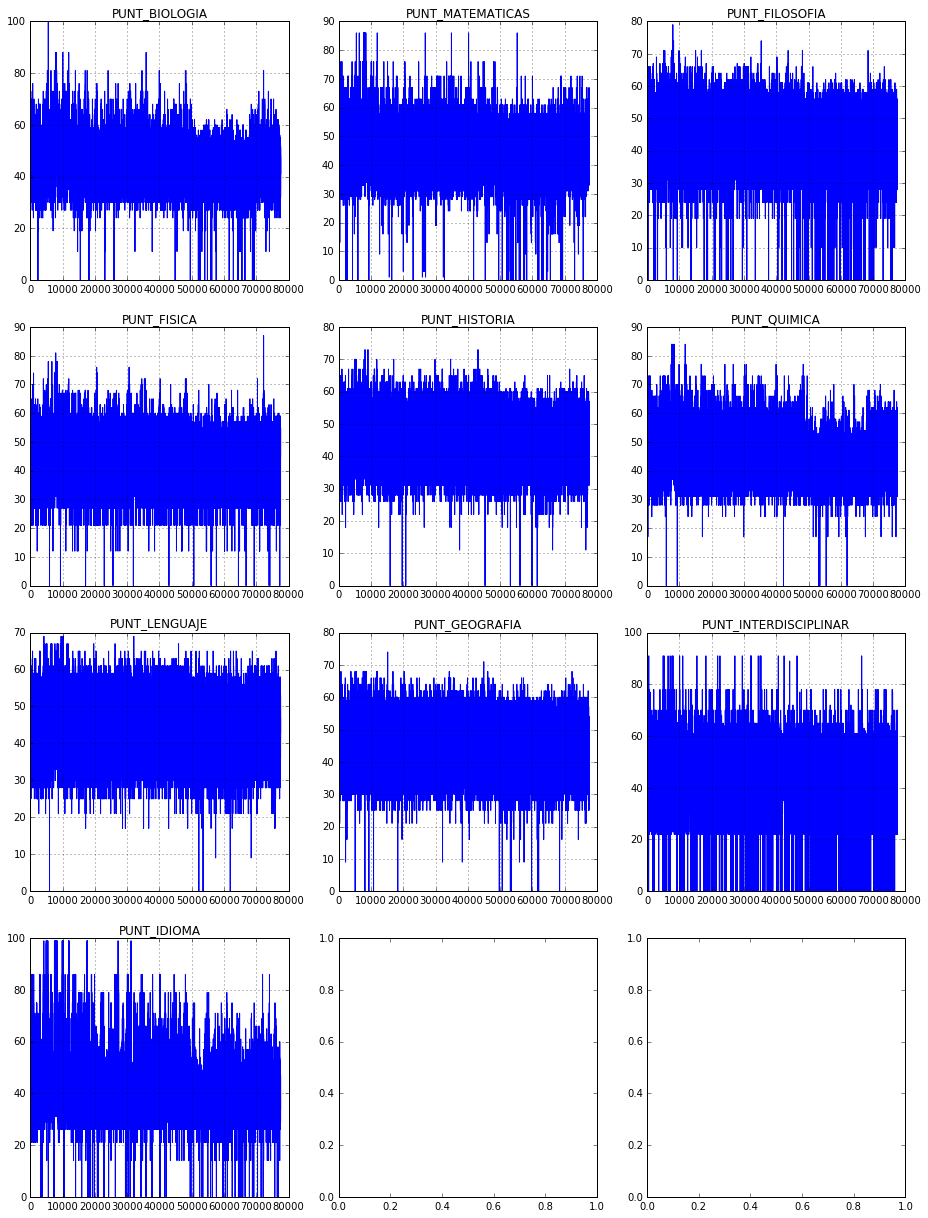

In [199]:
fig, axes = plt.subplots(4, 3, sharex=False, figsize=(13, 17))
axs = [i for i in axes.flatten()]
for n, i in enumerate(y_list):
    New_X = data_2000.filter(items = X_list)
    New_Y = data_2000.filter(items = y_list)
    ax = axs[n]
    ax.plot(range(New_Y.shape[0]), New_Y[i])
    ax.set_title(i)
    ax.grid()
plt.tight_layout(h_pad=2)

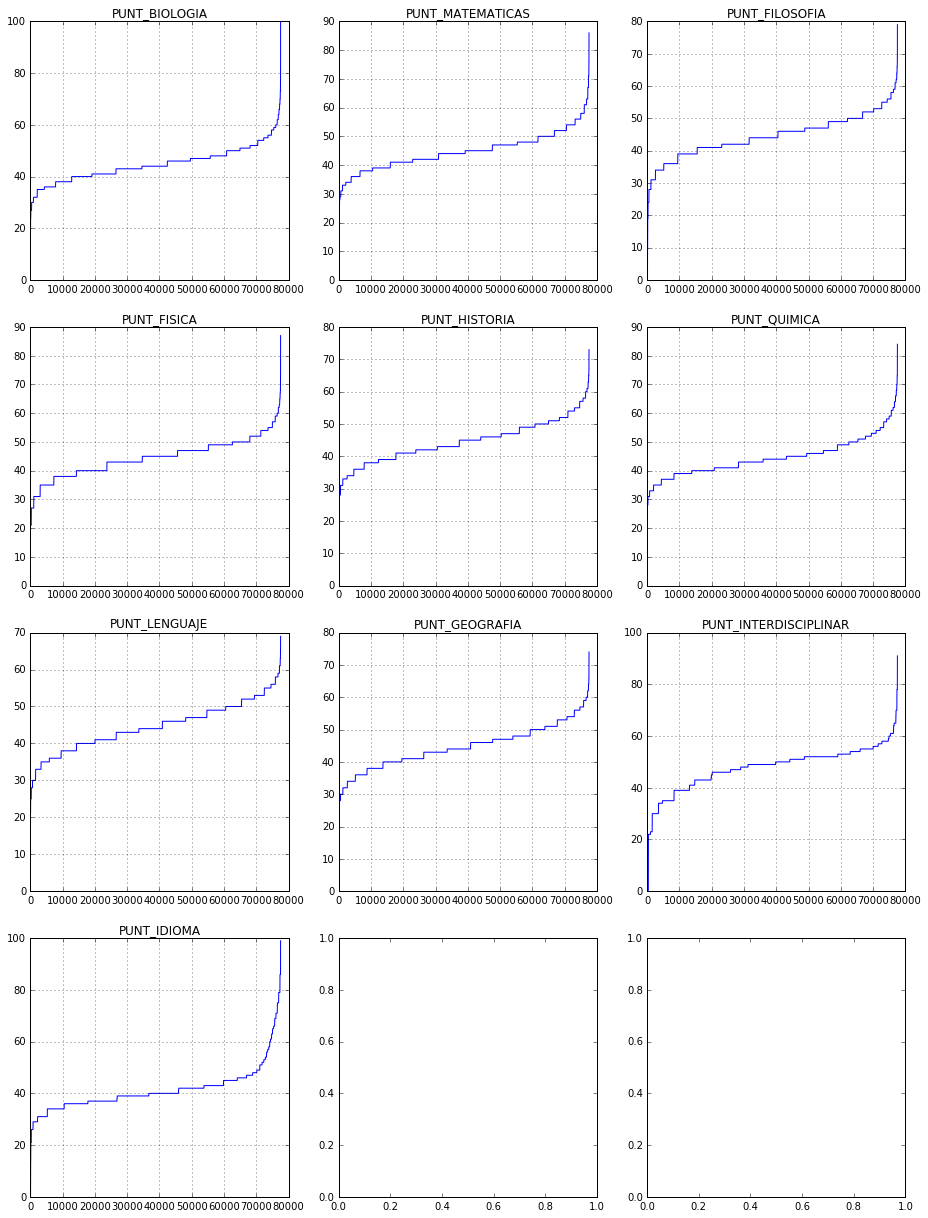

In [196]:
fig, axes = plt.subplots(4, 3, sharex=False, figsize=(13, 17))
axs = [i for i in axes.flatten()]
for n, i in enumerate(y_list):
    D_sorted = data_2000.sort_values(by=i)
    New_X = D_sorted.filter(items = X_list)
    New_Y = D_sorted.filter(items = y_list)
    #dic = Geo_Groups.get_group(i)
    ax = axs[n]
    ax.plot(range(New_Y.shape[0]), New_Y[i])
    ax.set_title(i)
    ax.grid()
plt.tight_layout(h_pad=2)

### Outliers Display

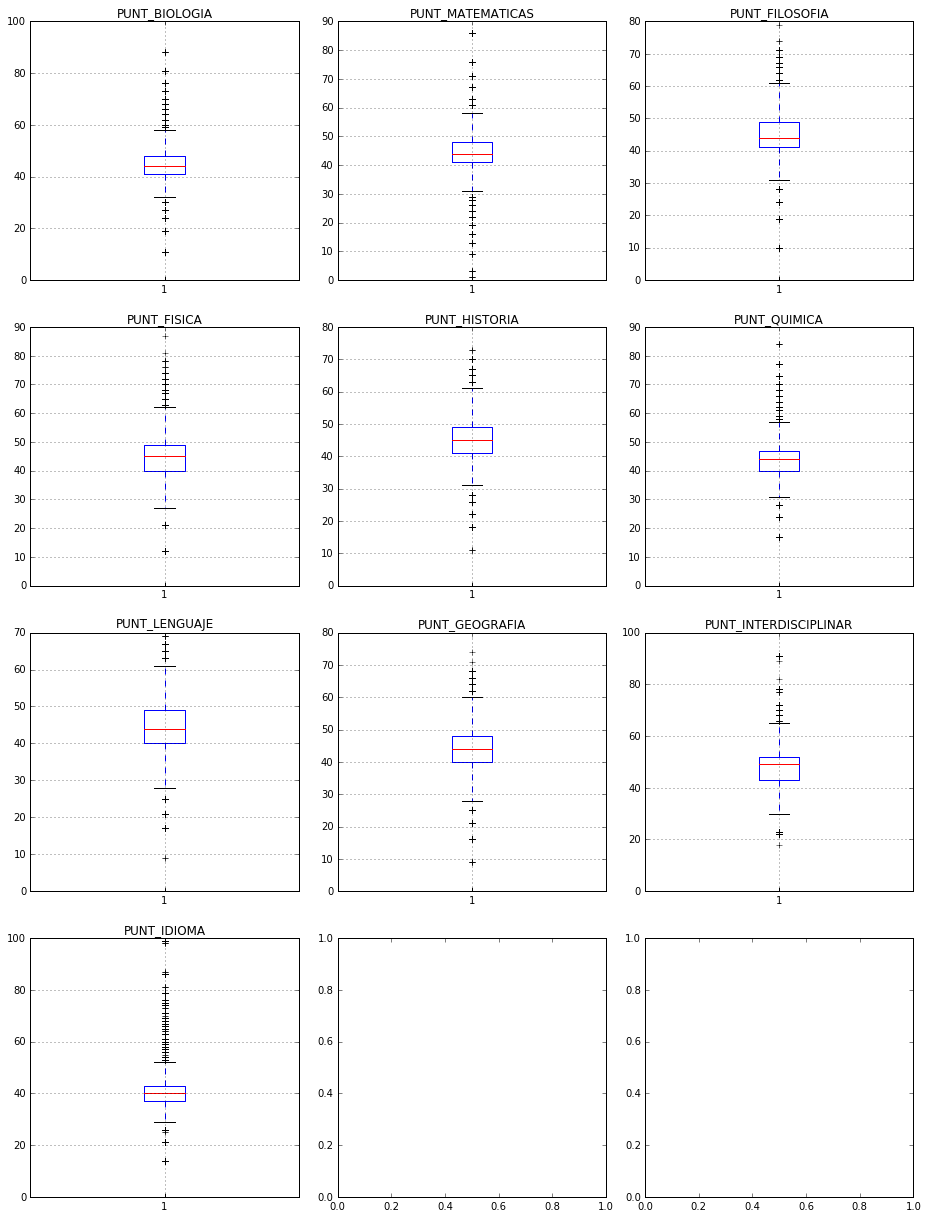

In [31]:
fig, axes = plt.subplots(4, 3, sharex=False, figsize=(13, 17))
axs = [i for i in axes.flatten()]
for n, i in enumerate(y_list):
    D_sorted = data_2000.sort_values(by=i)
    New_Y = D_sorted.filter(items = y_list)
    ax = axs[n]
    ax.boxplot(New_Y[i])
    ax.set_title(i)
    ax.grid()
plt.tight_layout(h_pad=2)

# <span style='color: blue'> SKLEARN LINEAR REGRESSION </span>

## BIOLOGIA

In [22]:
D_sorted = data_2000.sort_values(by='PUNT_BIOLOGIA')
X = D_sorted.filter(items=X_list)
Y = D_sorted.filter(items=y_list)
LR = LinearRegression()
LR.fit(X, Y['PUNT_BIOLOGIA'])
LR.score(X, Y['PUNT_BIOLOGIA'])

0.21220821168111892

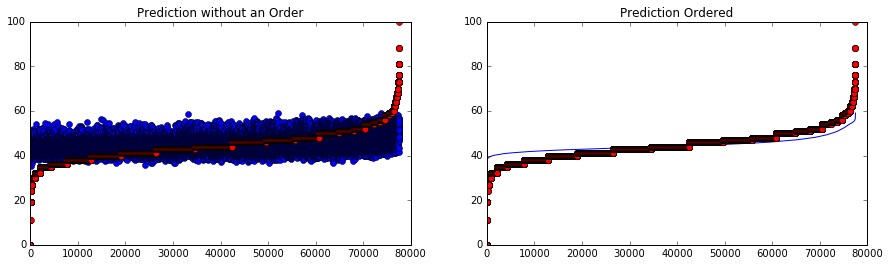

In [29]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(range(Y.shape[0]), LR.predict(X), 'bo')
plt.plot(range(Y.shape[0]), Y['PUNT_BIOLOGIA'], 'ro')
plt.title('Prediction without an Order')
plt.subplot(1,2,2)
y_pred = LR.predict(X)
y_pred.sort()
plt.plot(range(Y.shape[0]), y_pred)
plt.plot(range(Y.shape[0]), Y['PUNT_BIOLOGIA'], 'ro')
plt.title('Prediction Ordered')

### POLYNOMIAL

In [15]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = D_sorted.columns.difference(y_list)

CUBED (X³)

In [16]:
New_X = D_sorted.filter(items = X_list)
Cubed_X = New_X**3
Y_train = D_sorted.filter(items = y_list)

In [17]:
LR3 = LinearRegression()
LR3.fit(Cubed_X, Y_train['PUNT_BIOLOGIA'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
print('Score:', LR3.score(Cubed_X, Y_train['PUNT_BIOLOGIA'])*100)
LR_Statistics(Cubed_X, Y_train['PUNT_BIOLOGIA'], LR3.predict(Cubed_X))

Score: 19.1310852829
SSD o R²: 2614902.215512751 RSE: 5.80840997856 Y's Mean: 44.669001909480315 error: 13.0032231083


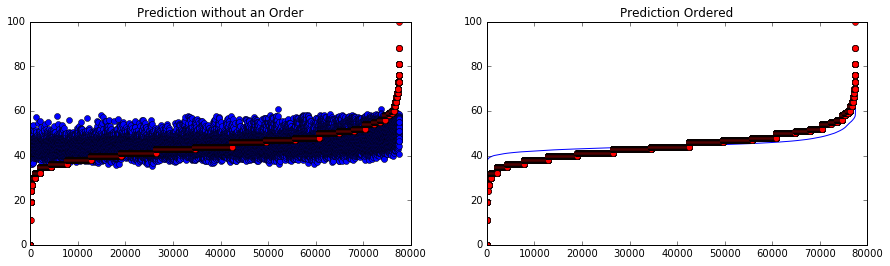

In [70]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(range(Y.shape[0]), LR3.predict(Cubed_X), 'bo')
plt.plot(range(Y.shape[0]), Y_train['PUNT_BIOLOGIA'], 'ro')
plt.title('Prediction without an Order')
plt.subplot(1,2,2)
y_pred = LR3.predict(Cubed_X)
y_pred.sort()
plt.plot(range(Y.shape[0]), y_pred)
plt.plot(range(Y.shape[0]), Y_train['PUNT_BIOLOGIA'], 'ro')
plt.title('Prediction Ordered')

SQUARED (X²)

In [50]:
New_X = D_sorted.filter(items = X_list)
Squared_X = New_X**2
Y_train = D_sorted.filter(items = y_list)

In [51]:
LR2 = LinearRegression()
LR2.fit(Squared_X, Y_train['PUNT_BIOLOGIA'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
print('Score:', LR2.score(Squared_X, Y_train['PUNT_BIOLOGIA'])*100)
LR_Statistics(Squared_X, Y_train['PUNT_BIOLOGIA'], LR2.predict(Squared_X))

Score: 20.246091105
SSD o R²: 2578848.421482881 RSE: 5.76822834575 Y's Mean: 44.669001909480315 error: 12.9132689319


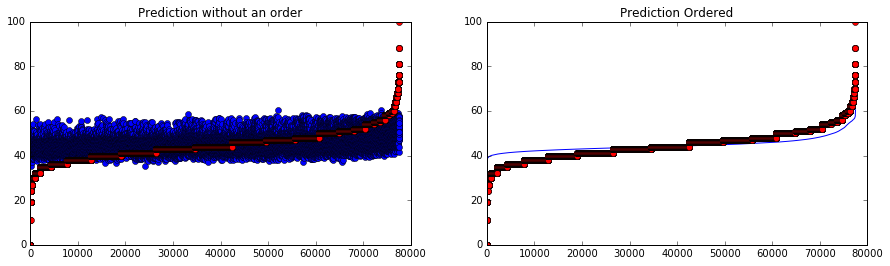

In [71]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(range(Y.shape[0]), LR2.predict(Squared_X), 'bo')
plt.plot(range(Y.shape[0]), Y_train['PUNT_BIOLOGIA'], 'ro')
plt.title('Prediction without an order')
plt.subplot(1,2,2)
y_pred = LR2.predict(Squared_X)
y_pred.sort()
plt.plot(range(Y.shape[0]), y_pred)
plt.plot(range(Y.shape[0]), Y_train['PUNT_BIOLOGIA'], 'ro')
plt.title('Prediction Ordered')

### Polynomial Regression with Polynomial Features

**first with degree = 2**

In [116]:
D_sorted = data_2000.sort_values(by='PUNT_BIOLOGIA')
New_X = D_sorted.filter(items = X_list)
New_Y = D_sorted.filter(items = y_list)

In [110]:
Poly = PolynomialFeatures(degree=2)
Poly_X = Poly.fit_transform(New_X)

In [111]:
LR_Poly = LinearRegression()
LR_Poly.fit(Poly_X, New_Y['PUNT_BIOLOGIA'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [112]:
print('Score:', LR_Poly.score(Poly_X, New_Y['PUNT_BIOLOGIA'])*100)
LR_Statistics(Poly_X, New_Y['PUNT_BIOLOGIA'], LR_Poly.predict(Poly_X))

Score: 25.9914193487
SSD o R²: 2393072.8165321983 RSE: 5.55657899807 Y's Mean: 44.669001909480315 error: 12.4394518806


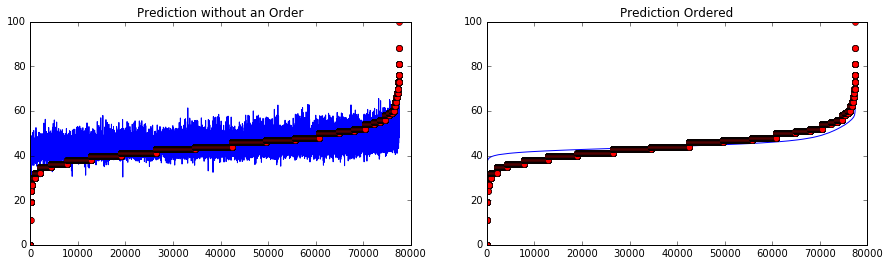

In [72]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(range(Y.shape[0]), LR_Poly.predict(Poly_X))
plt.plot(range(Y.shape[0]), Y_train['PUNT_BIOLOGIA'], 'ro')
plt.title('Prediction without an Order')
plt.subplot(1,2,2)
y_pred = LR_Poly.predict(Poly_X)
y_pred.sort()
plt.plot(range(Y.shape[0]), y_pred)
plt.plot(range(Y.shape[0]), Y_train['PUNT_BIOLOGIA'], 'ro')
plt.title('Prediction Ordered')

** Now degree = 3 **

In [122]:
D_sorted = data_2000.sort_values(by='PUNT_BIOLOGIA')
New_3_X = D_sorted.filter(items = X_list)
New_3_Y = D_sorted.filter(items = y_list)

In [74]:
Poly = PolynomialFeatures(degree=3)
Poly_X3 = Poly.fit_transform(New_X)

In [75]:
LR_Poly = LinearRegression()
LR_Poly.fit(Poly_X3, New_Y['PUNT_BIOLOGIA'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
print('Score:', LR_Poly.score(Poly_X3, New_Y['PUNT_BIOLOGIA'])*100)
LR_Statistics(Poly_X3, New_Y['PUNT_BIOLOGIA'], LR_Poly.predict(Poly_X3))

Score: 33.8700196591
SSD o R²: 2138317.7047695536 RSE: 5.25249505546 Y's Mean: 44.669001909480315 error: 11.7587025251


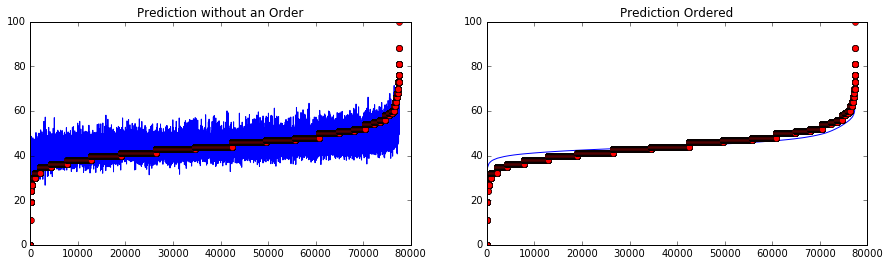

In [77]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(range(Y.shape[0]), LR_Poly.predict(Poly_X3))
plt.plot(range(Y.shape[0]), Y_train['PUNT_BIOLOGIA'], 'ro')
plt.title('Prediction without an Order')
plt.subplot(1,2,2)
y_pred = LR_Poly.predict(Poly_X3)
y_pred.sort()
plt.plot(range(Y.shape[0]), y_pred)
plt.plot(range(Y.shape[0]), Y_train['PUNT_BIOLOGIA'], 'ro')
plt.title('Prediction Ordered')

With degree 4  
MEMORY ERROR

In [123]:
get_Poly_prediction(4, D_sorted, 'PUNT_BIOLOGIA')

MemoryError: 

____

_____

### MATEMATICAS

In [79]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = D_sorted.columns.difference(y_list)

In [119]:
c = 'PUNT_MATEMATICAS'
D_sorted = data_2000.sort_values(by=c)
X = D_sorted.filter(items=X_list)
Y = D_sorted.filter(items=y_list)
LR = LinearRegression()
LR.fit(X, Y[c])
print('Score:', LR.score(X, Y[c])*100)
LR_Statistics(X, Y[c], LR.predict(X))

Score: 11.6823334737
SSD o R²: 2753525.092818721 RSE: 5.96038146624 Y's Mean: 44.692018888372814 error: 13.3365679477


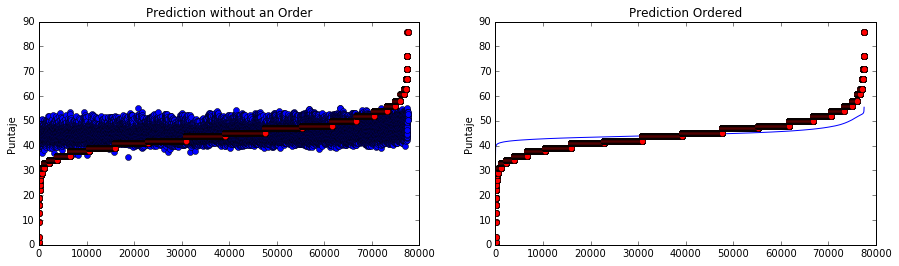

In [67]:
plot_predictions(LR, c, X, Y)

### Polynomial

In [80]:
New_X = D_sorted.filter(items = X_list)
Cubed_X = New_X**3
Y_train = D_sorted.filter(items = y_list)

In [81]:
LR3 = LinearRegression()
LR3.fit(Cubed_X, Y_train[c])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
print('Score:', LR3.score(Cubed_X, Y_train[c])*100)
LR_Statistics(Cubed_X, Y_train[c], LR3.predict(Cubed_X))

Score: 11.1725212578
SSD o R²: 2769419.76921049 RSE: 5.9775598114 Y's Mean: 44.692018888372814 error: 13.3750051129


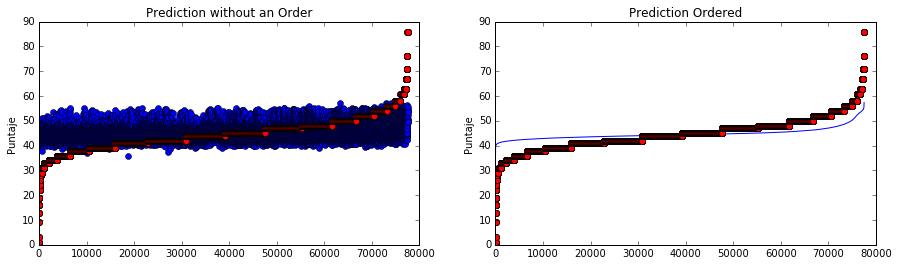

In [83]:
plot_predictions(LR3, c, Cubed_X, Y_train)

SQUARED (X²)

In [90]:
New_X = D_sorted.filter(items = X_list)
Squared_X = New_X**2
Y_train = D_sorted.filter(items = y_list)

In [91]:
LR2 = LinearRegression()
LR2.fit(Squared_X, Y_train[c])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
print('Score:', LR2.score(Squared_X, Y_train[c])*100)
LR_Statistics(Squared_X, Y_train[c], LR2.predict(Squared_X))

Score: 11.5321998857
SSD o R²: 2758205.8845340684 RSE: 5.96544542183 Y's Mean: 44.692018888372814 error: 13.3478987305


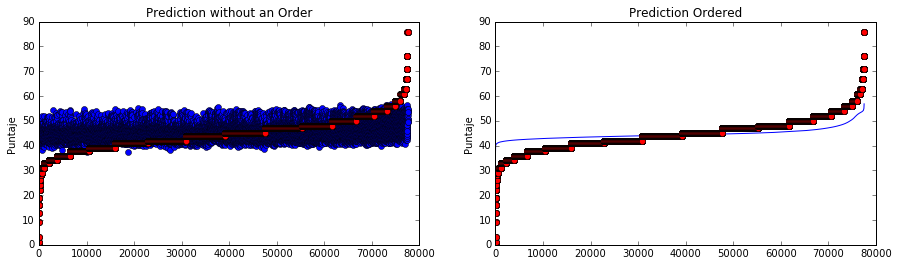

In [93]:
plot_predictions(LR2, c, Squared_X, Y_train)

### With Polynomial Features

With degree = 2

The Model with the new "PolyData" with degree 2 give:
Score: 15.6868977353
SSD o R²: 2628672.7431827555 RSE: 5.82368394228 Y's Mean: 44.692018888372814 error: 13.0307023203


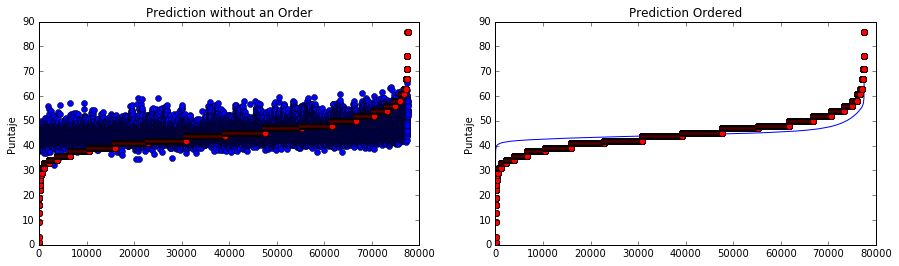

In [120]:
get_Poly_prediction(2, D_sorted, c)

With degree = 3

The Model with the new "PolyData" with degree 3 give:
Score: 23.4612761838
SSD o R²: 2386286.9671441983 RSE: 5.54869522706 Y's Mean: 44.692018888372814 error: 12.4154051776


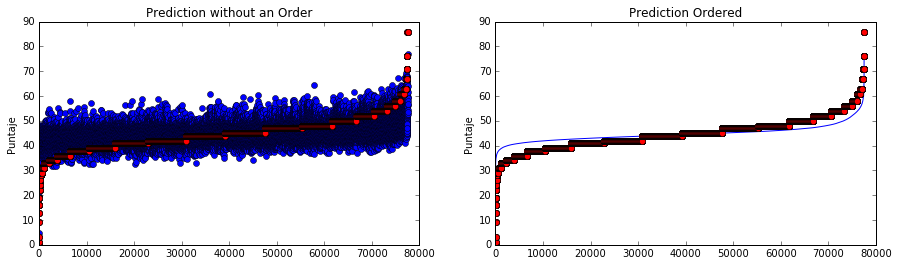

In [121]:
get_Poly_prediction(3, D_sorted, c)

### Filosofia

Score: 10.7799808609
SSD o R²: 2987770.611874953 RSE: 6.20873554536 Y's Mean: 44.487588377973886 error: 13.9561072464


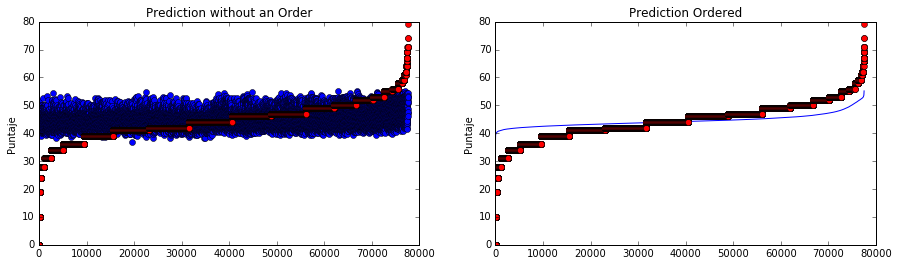

In [10]:
c = 'PUNT_FILOSOFIA'
D_sorted = data_2000.sort_values(by=c)
X = D_sorted.filter(items=X_list)
Y = D_sorted.filter(items=y_list)
LR = LinearRegression()
LR.fit(X, Y[c])
print('Score:', LR.score(X, Y[c])*100)
LR_Statistics(X, Y[c], LR.predict(X))
plot_predictions(LR, c, X, Y)

The Model with the Data raised to the power of 2 give:
Score: 10.4352500136
SSD o R²: 2999314.8449331177 RSE: 6.22071872576 Y's Mean: 44.487588377973886 error: 13.9830432545


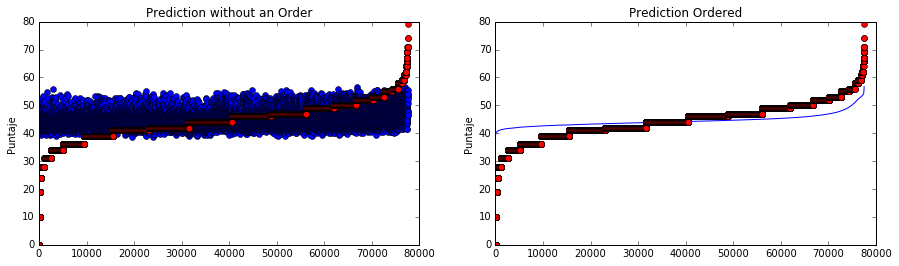

In [14]:
get_exp_prediction(2, D_sorted, c)

The Model with the Data raised to the power of 3 give:
Score: 9.88310532071
SSD o R²: 3017804.884532595 RSE: 6.23986386661 Y's Mean: 44.487588377973886 error: 14.0260780459


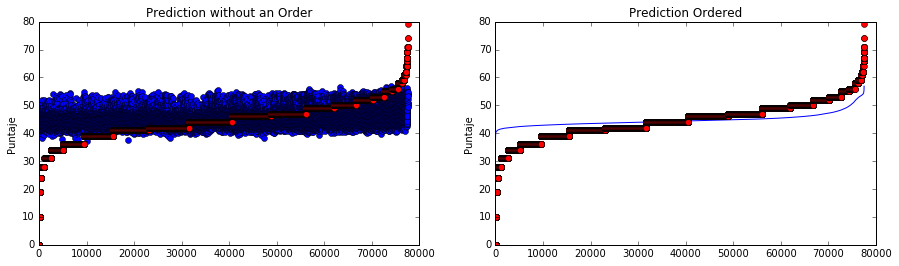

In [128]:
get_exp_prediction(3, D_sorted, c)

#### Polynomial Features  
degree 2

The Model with the new "PolyData" with degree 2 give:
Score: 13.8100128278
SSD o R²: 2886301.8994578333 RSE: 6.10239638256 Y's Mean: 44.487588377973886 error: 13.7170761668


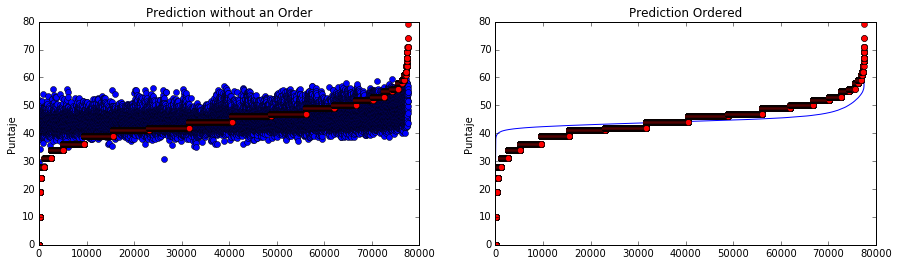

In [129]:
get_Poly_prediction(2, D_sorted, c)

degree 3

The Model with the new "PolyData" with degree 3 give:
Score: 23.4200639385
SSD o R²: 2564483.67341283 RSE: 5.75214076676 Y's Mean: 44.487588377973886 error: 12.9297653042


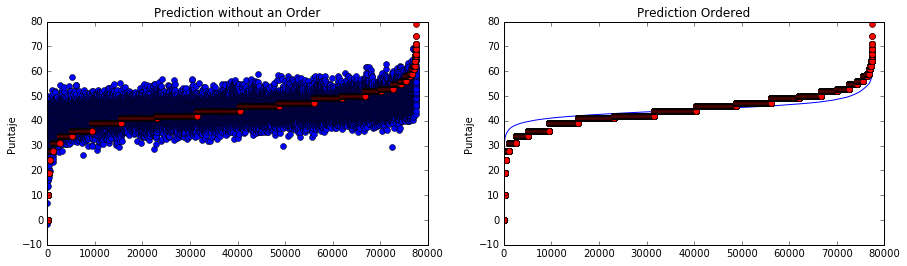

In [11]:
get_Poly_prediction(3, D_sorted, c)

## Fisica / Physics

Score: 8.11203704174
SSD : 2984252.116603178 RSE: 6.20507866457 Y's Mean: 44.513276048923984 error: 13.9398382131


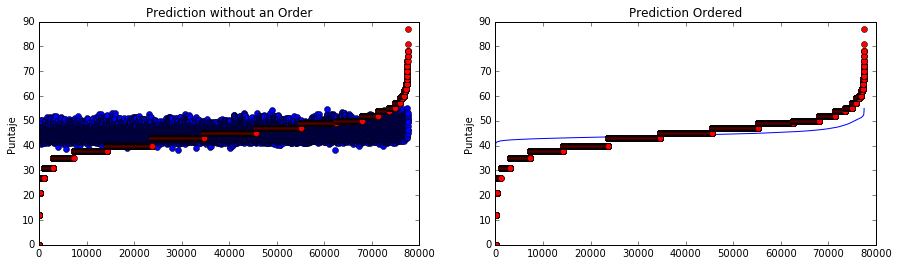

In [23]:
c = 'PUNT_FISICA'
D_sorted = data_2000.sort_values(by=c)
X = D_sorted.filter(items=X_list)
Y = D_sorted.filter(items=y_list)
LR = LinearRegression()
LR.fit(X, Y[c])
print('Score:', LR.score(X, Y[c])*100)
LR_Statistics(X, Y[c], LR.predict(X))
plot_predictions(LR, c, X, Y)

The Model with the Data raised to the power of 2 give:
Score: 8.25915992625
SSD o R²: 2979473.995885629 RSE: 6.20010916284 Y's Mean: 44.513276048923984 error: 13.9286741241


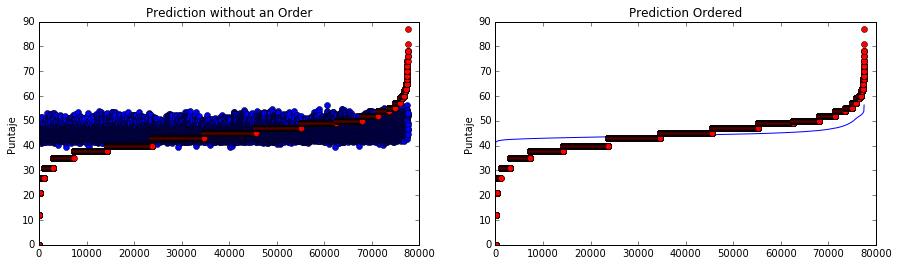

In [14]:
get_exp_prediction(2, D_sorted, c)

The Model with the Data raised to the power of 3 give:
Score: 7.98353170472
SSD o R²: 2988425.5938643855 RSE: 6.2094160506 Y's Mean: 44.513276048923984 error: 13.949582241


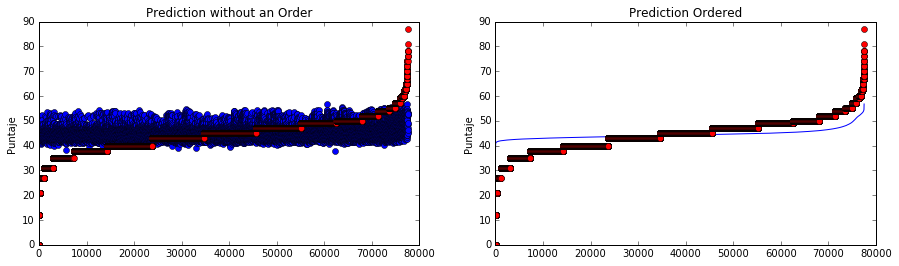

In [15]:
get_exp_prediction(3, D_sorted, c)

#### Polynomial Features  
degree 2

The Model with the new "PolyData" with degree 2 gives:
Score: 11.4127383224
SSD : 2877054.998873794 RSE: 6.09261335877 Y's Mean: 44.513276048923984 error: 13.6871825657


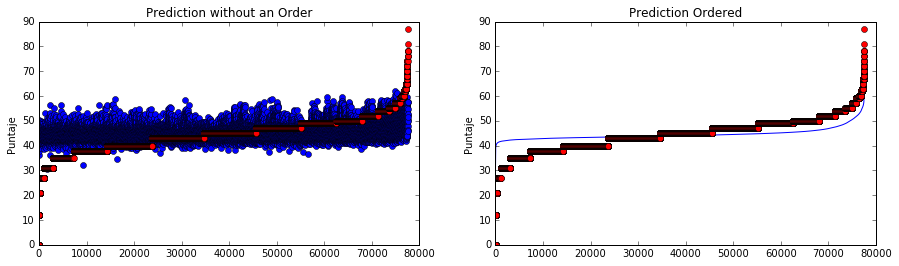

In [24]:
get_Poly_prediction(2, D_sorted, c)

degree 3

The Model with the new "PolyData" with degree 3 gives:
Score: 22.4510805398
SSD : 2518561.9485816667 RSE: 5.70040687412 Y's Mean: 44.513276048923984 error: 12.8060825446


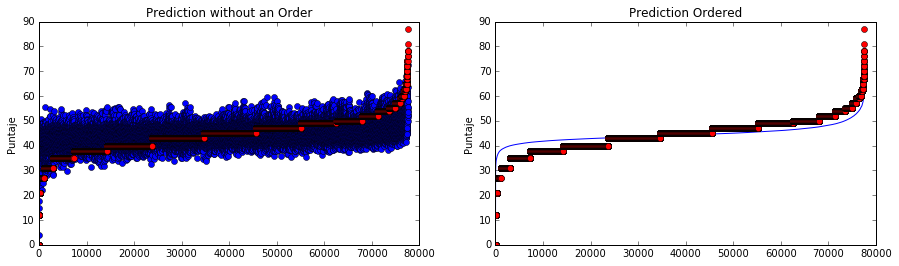

In [25]:
get_Poly_prediction(3, D_sorted, c)

## History

Score: 15.1040158029
SSD : 2537658.5708568967 RSE: 5.72197730733 Y's Mean: 44.511624606492234 error: 12.8550178923


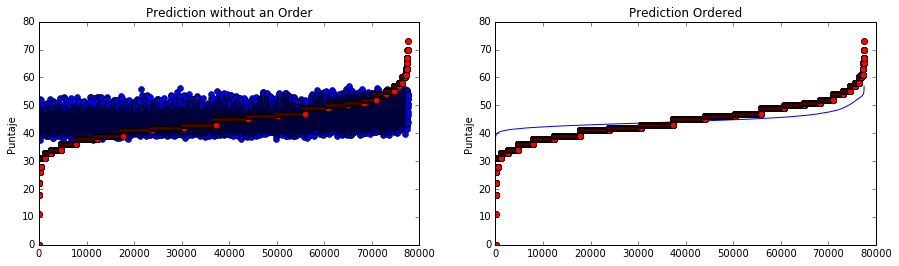

In [11]:
c = 'PUNT_HISTORIA'
D_sorted = data_2000.sort_values(by=c)
X = D_sorted.filter(items=X_list)
Y = D_sorted.filter(items=y_list)
LR = LinearRegression()
LR.fit(X, Y[c])
print('Score:', LR.score(X, Y[c])*100)
LR_Statistics(X, Y[c], LR.predict(X))
plot_predictions(LR, c, X, Y)

Power to 2

The Model with the Data raised to the power of 2 give:
Score: 14.7712106859
SSD : 2547606.576825777 RSE: 5.73318184607 Y's Mean: 44.511624606492234 error: 12.8801900554


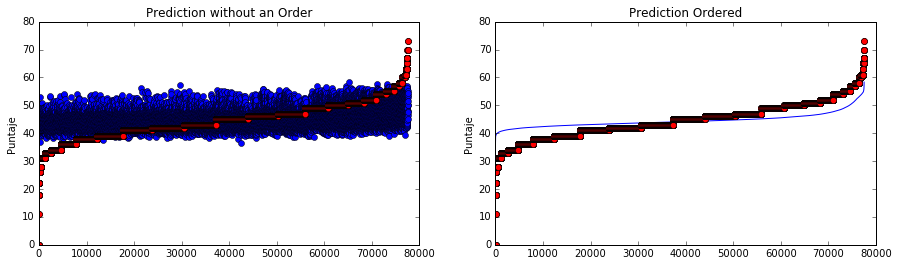

In [27]:
get_exp_prediction(2, D_sorted, c)

Powered to 3

The Model with the Data raised to the power of 3 give:
Score: 14.0789640409
SSD : 2568298.7879883368 RSE: 5.75641783052 Y's Mean: 44.511624606492234 error: 12.9323921142


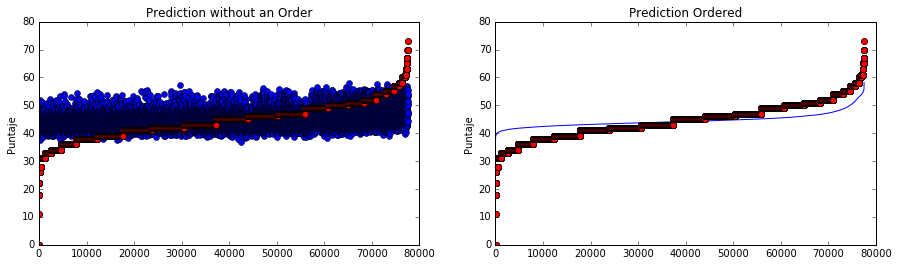

In [28]:
get_exp_prediction(3, D_sorted, c)

#### Polynomial Features

The Model with the new "PolyData" with degree 2 gives:
Score: 20.3428978244
SSD : 2381061.130010065 RSE: 5.54261622847 Y's Mean: 44.511624606492234 error: 12.4520645505


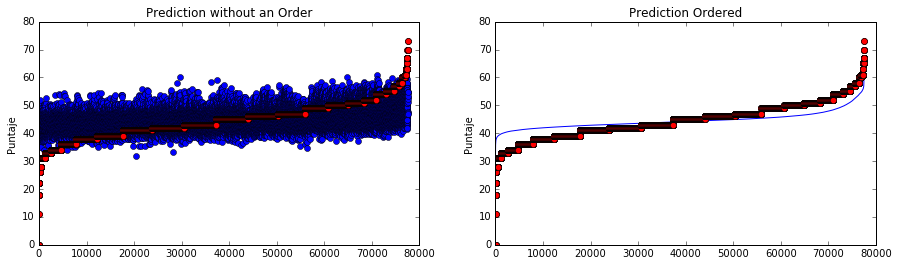

In [ ]:
get_Poly_prediction(2, D_sorted, c)

The Model with the new "PolyData" with degree 3 gives:
Score: 30.8783953458
SSD : 2066140.514667571 RSE: 5.16308723896 Y's Mean: 44.511624606492234 error: 11.5994131524


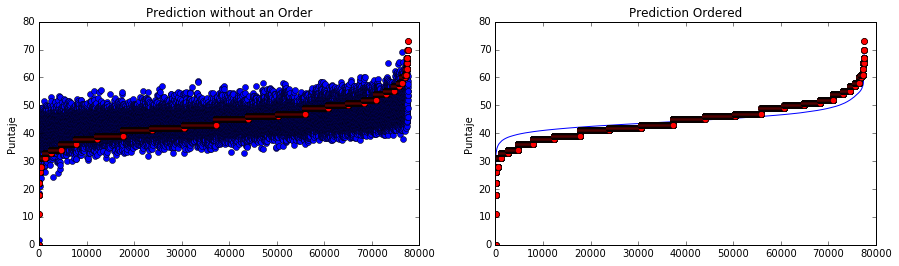

In [12]:
get_Poly_prediction(3, D_sorted, c)

### Chemistry

Score: 24.8829044041
SSD : 2348325.6030987236 RSE: 5.50438360843 Y's Mean: 44.58339784280332 error: 12.3462631265


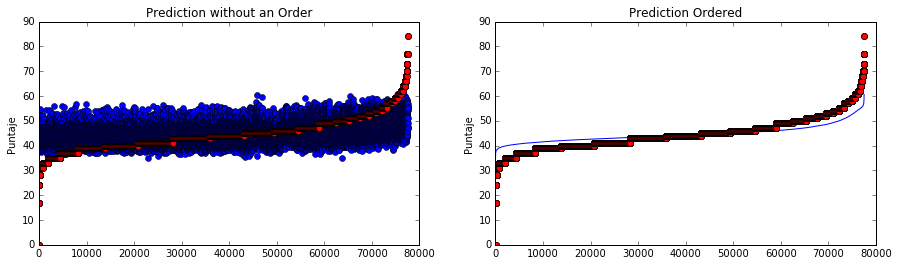

In [10]:
c = 'PUNT_QUIMICA'
D_sorted = data_2000.sort_values(by=c)
X = D_sorted.filter(items=X_list)
Y = D_sorted.filter(items=y_list)
LR = LinearRegression()
LR.fit(X, Y[c])
print('Score:', LR.score(X, Y[c])*100)
LR_Statistics(X, Y[c], LR.predict(X))
plot_predictions(LR, c, X, Y)

#### Powered to 2 and 3

The Model with the Data raised to the power of 2 give:
Score: 24.8924410749
SSD : 2348027.4657972106 RSE: 5.50403418623 Y's Mean: 44.58339784280332 error: 12.345479377


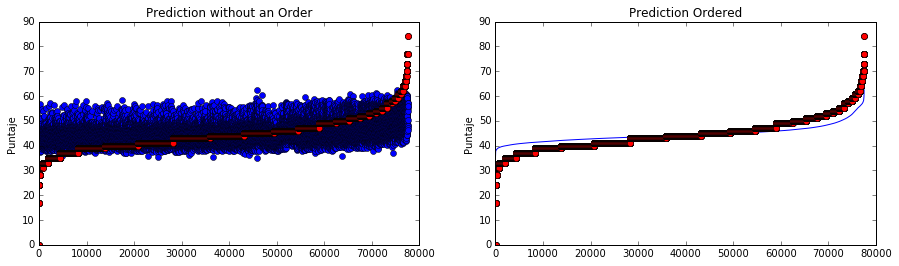

In [14]:
get_exp_prediction(2, D_sorted, c)

The Model with the Data raised to the power of 3 give:
Score: 24.1823286617
SSD : 2370227.141486073 RSE: 5.52999221348 Y's Mean: 44.58339784280332 error: 12.4037029052


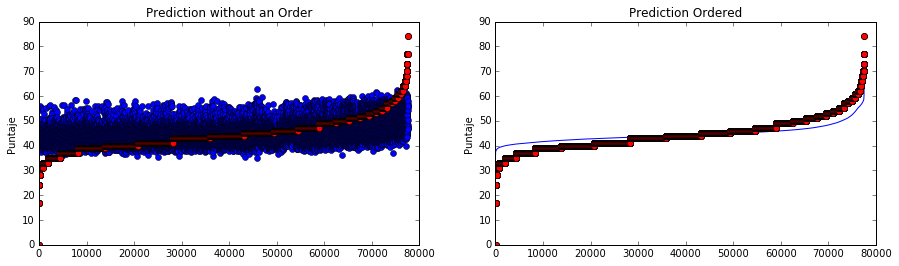

In [15]:
get_exp_prediction(3, D_sorted, c)

#### Polynomial Features

The Model with the new "PolyData" with degree 2 gives:
Score: 31.3872543567
SSD : 2144985.3194514127 RSE: 5.26067773917 Y's Mean: 44.58339784280332 error: 11.7996339304


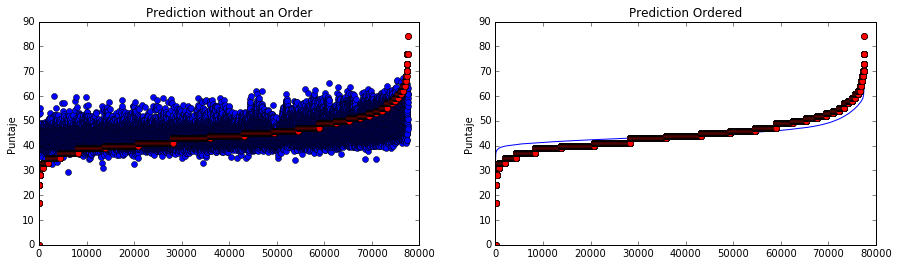

In [16]:
get_Poly_prediction(2, D_sorted, c)

The Model with the new "PolyData" with degree 3 gives:
Score: 39.4767594845
SSD : 1892089.5990118447 RSE: 4.94083539499 Y's Mean: 44.58339784280332 error: 11.0822315796
The prediction took: 10257.092375516891 seconds


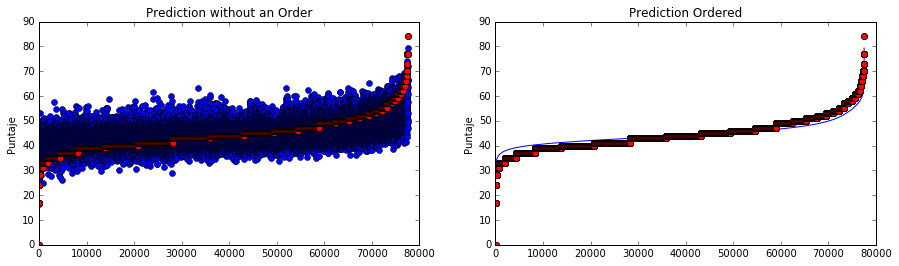

In [11]:
get_Poly_prediction(3, D_sorted, c)

### Language

Score: 13.443038932
SSD : 2688337.718103129 RSE: 5.88940538368 Y's Mean: 44.539570108891986 error: 13.2228608612


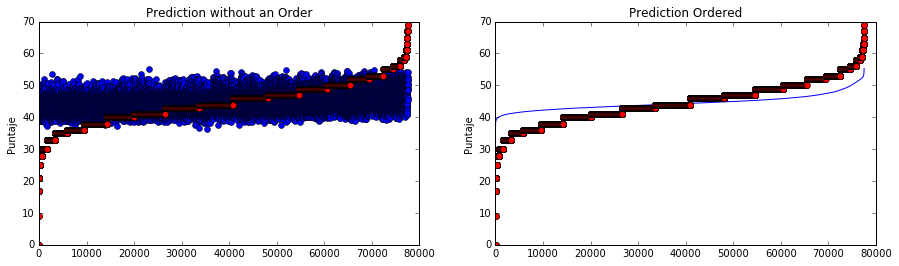

In [12]:
c = 'PUNT_LENGUAJE'
D_sorted = data_2000.sort_values(by=c)
X = D_sorted.filter(items=X_list)
Y = D_sorted.filter(items=y_list)
LR = LinearRegression()
LR.fit(X, Y[c])
print('Score:', LR.score(X, Y[c])*100)
LR_Statistics(X, Y[c], LR.predict(X))
plot_predictions(LR, c, X, Y)

#### Powered to 2 and 3

The Model with the Data raised to the power of 2 give:
Score: 12.9323121766
SSD : 2704200.1742605185 RSE: 5.90675495866 Y's Mean: 44.539570108891986 error: 13.2618140324


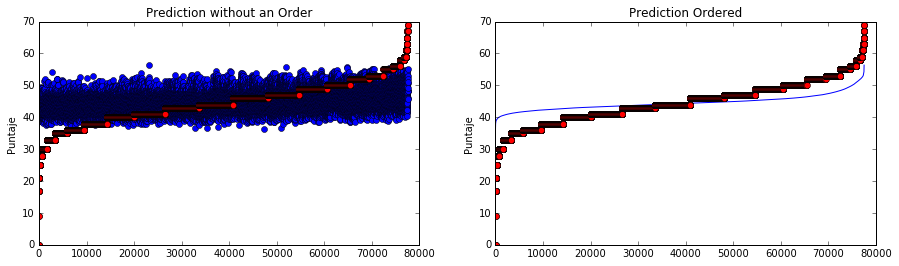

In [18]:
get_exp_prediction(2, D_sorted, c)

The Model with the Data raised to the power of 3 give:
Score: 12.105274152
SSD : 2729886.814462472 RSE: 5.93474217861 Y's Mean: 44.539570108891986 error: 13.324650786


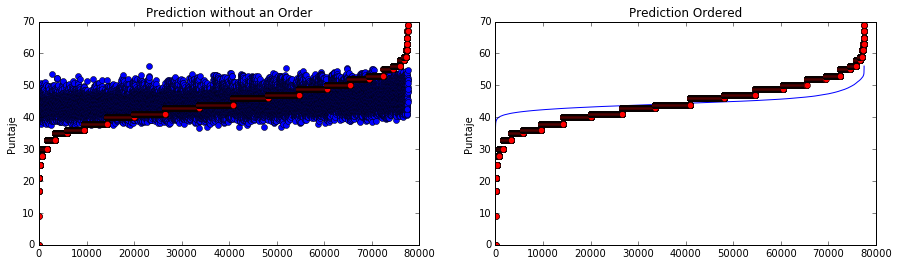

In [19]:
get_exp_prediction(3, D_sorted, c)

#### Polynomial Features

The Model with the new "PolyData" with degree 2 gives:
Score: 18.0307036633
SSD : 2545851.2908631912 RSE: 5.73120644145 Y's Mean: 44.539570108891986 error: 12.8676734585


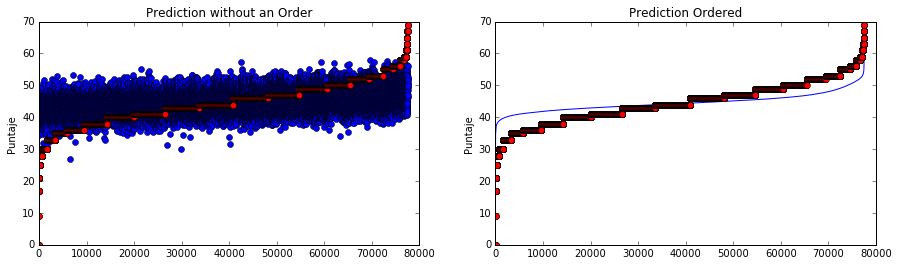

In [20]:
get_Poly_prediction(2, D_sorted, c)

In [ ]:
get_Poly_prediction(3, D_sorted, c)

### Geography

Score: 12.6091810774
SSD : 2813503.109551578 RSE: 6.02494707206 Y's Mean: 44.647649274913555 error: 13.4944328983


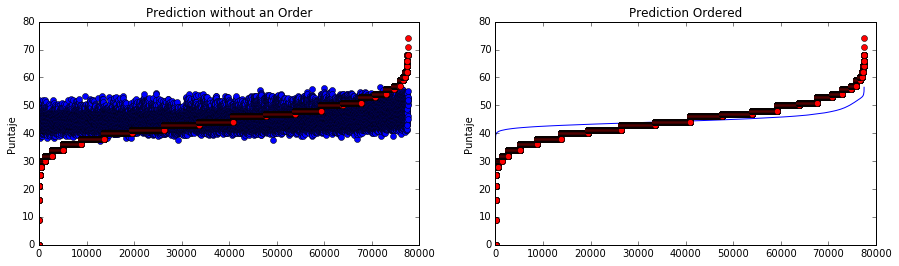

In [22]:
c = 'PUNT_GEOGRAFIA'
D_sorted = data_2000.sort_values(by=c)
X = D_sorted.filter(items=X_list)
Y = D_sorted.filter(items=y_list)
LR = LinearRegression()
LR.fit(X, Y[c])
print('Score:', LR.score(X, Y[c])*100)
LR_Statistics(X, Y[c], LR.predict(X))
plot_predictions(LR, c, X, Y)

#### Powered to 2 and 3

The Model with the Data raised to the power of 2 give:
Score: 12.3034212531
SSD : 2823346.8920814106 RSE: 6.03547780201 Y's Mean: 44.647649274913555 error: 13.5180192015


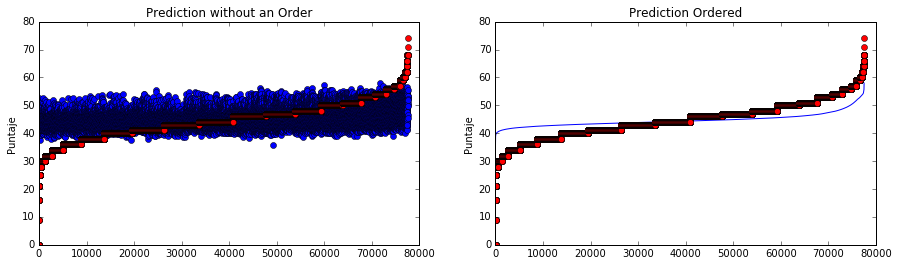

In [23]:
get_exp_prediction(2, D_sorted, c)

The Model with the Data raised to the power of 3 give:
Score: 11.6105627827
SSD : 2845653.119267795 RSE: 6.05927294238 Y's Mean: 44.647649274913555 error: 13.571314595


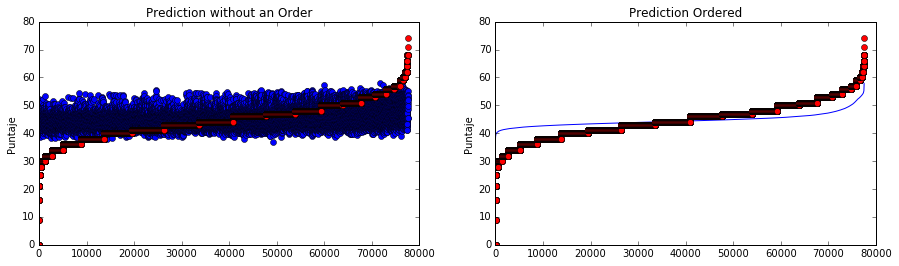

In [24]:
get_exp_prediction(3, D_sorted, c)

#### Polynomial Features

The Model with the new "PolyData" with degree 2 gives:
Score: 17.2393422711
SSD : 2664437.4173349272 RSE: 5.86316745862 Y's Mean: 44.647649274913555 error: 13.1320854599


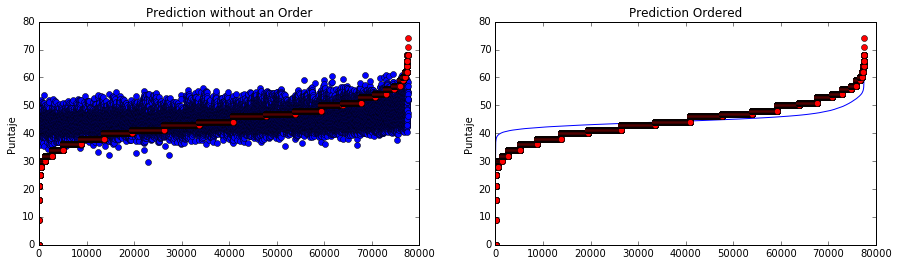

In [25]:
get_Poly_prediction(2, D_sorted, c)

In [ ]:
get_Poly_prediction(3, D_sorted, c)

### Interdisciplinary

Score: 20.15703052
SSD : 4419398.11980113 RSE: 7.55111526427 Y's Mean: 47.782293440677094 error: 15.803166237


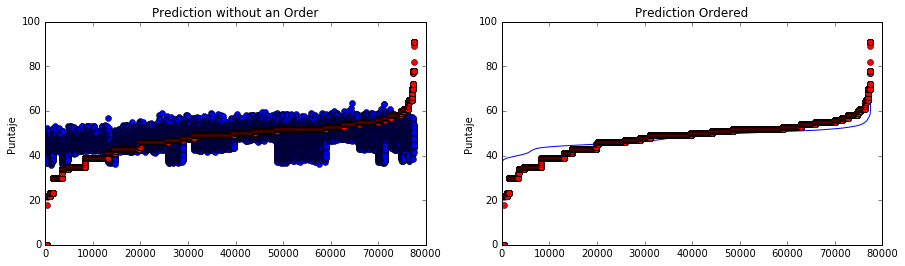

In [26]:
c = 'PUNT_INTERDISCIPLINAR'
D_sorted = data_2000.sort_values(by=c)
X = D_sorted.filter(items=X_list)
Y = D_sorted.filter(items=y_list)
LR = LinearRegression()
LR.fit(X, Y[c])
print('Score:', LR.score(X, Y[c])*100)
LR_Statistics(X, Y[c], LR.predict(X))
plot_predictions(LR, c, X, Y)

#### Powered to 2 and 3

The Model with the Data raised to the power of 2 give:
Score: 20.0278837079
SSD : 4426546.541037674 RSE: 7.55721979946 Y's Mean: 47.782293440677094 error: 15.8159419636


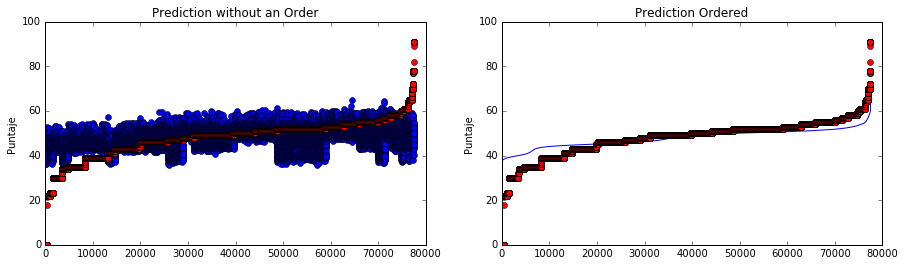

In [27]:
get_exp_prediction(2, D_sorted, c)

The Model with the Data raised to the power of 3 give:
Score: 19.792844669
SSD : 4439556.216066038 RSE: 7.56831703294 Y's Mean: 47.782293440677094 error: 15.8391665363


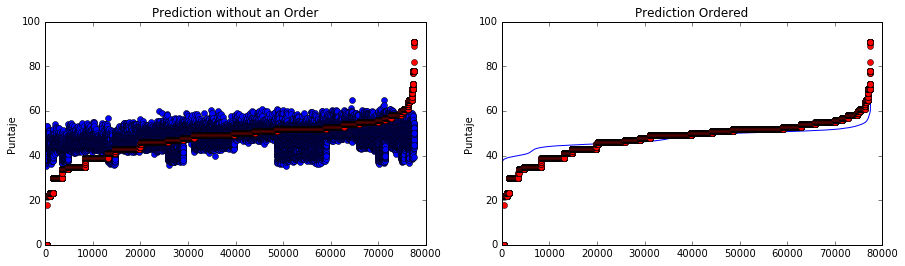

In [28]:
get_exp_prediction(3, D_sorted, c)

#### Polynomial Features

In [32]:
from time import time

The Model with the new "PolyData" with degree 2 gives:
Score: 26.1522272057
SSD : 4087557.2434744504 RSE: 7.26208721272 Y's Mean: 47.782293440677094 error: 15.1982809736
The execution took:  40.774036169052124 seconds


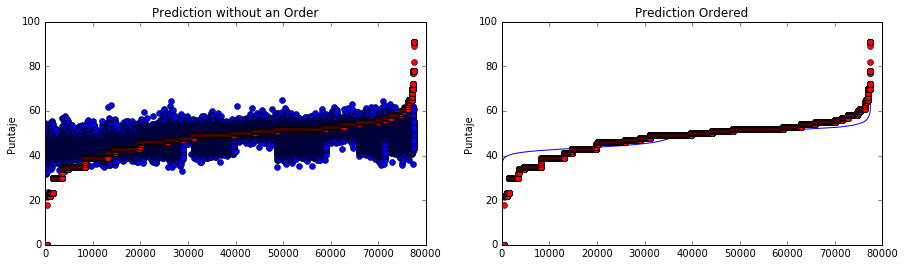

In [34]:
starttime = time()
get_Poly_prediction(2, D_sorted, c)
elapsedtime = time()-starttime
print('The execution took: ', elapsedtime, 'seconds')

In [ ]:
get_Poly_prediction(3, D_sorted, c)

### Idiom

Score: 34.9402568764
SSD : 3478781.287777984 RSE: 6.69951091489 Y's Mean: 41.186032409557725 error: 16.2664634657


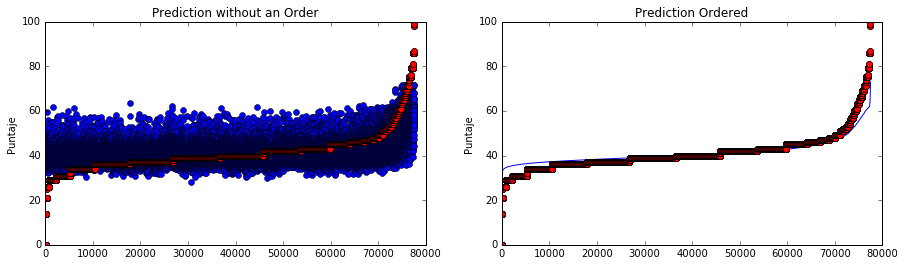

In [37]:
c = 'PUNT_IDIOMA'
D_sorted = data_2000.sort_values(by=c)
X = D_sorted.filter(items=X_list)
Y = D_sorted.filter(items=y_list)
LR = LinearRegression()
LR.fit(X, Y[c])
print('Score:', LR.score(X, Y[c])*100)
LR_Statistics(X, Y[c], LR.predict(X))
plot_predictions(LR, c, X, Y)

#### Powered to 2 and 3

The Model with the Data raised to the power of 2 give:
Score: 36.9799662595
SSD : 3369716.872618211 RSE: 6.59365534589 Y's Mean: 41.186032409557725 error: 16.009445339


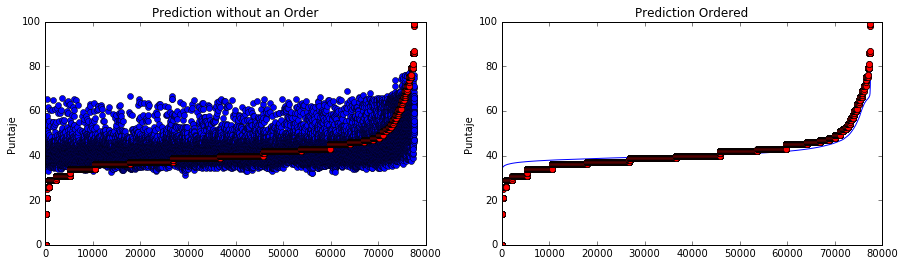

In [38]:
get_exp_prediction(2, D_sorted, c)

The Model with the Data raised to the power of 3 give:
Score: 37.0309110986
SSD : 3366992.823237577 RSE: 6.59098968066 Y's Mean: 41.186032409557725 error: 16.0029730835


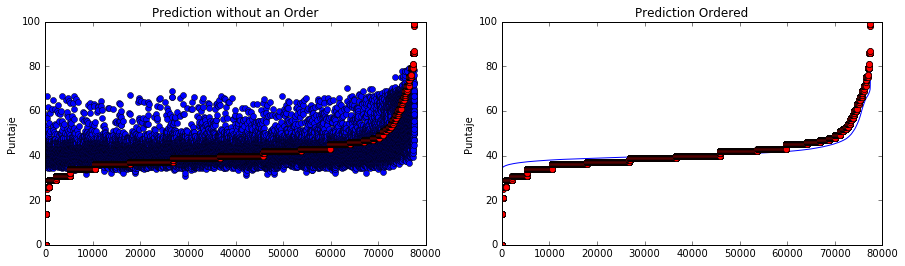

In [39]:
get_exp_prediction(3, D_sorted, c)

#### Polynomial Features

The Model with the new "PolyData" with degree 2 gives:
Score: 46.0298616212
SSD : 2885813.8455061084 RSE: 6.10188042396 Y's Mean: 41.186032409557725 error: 14.8154120875


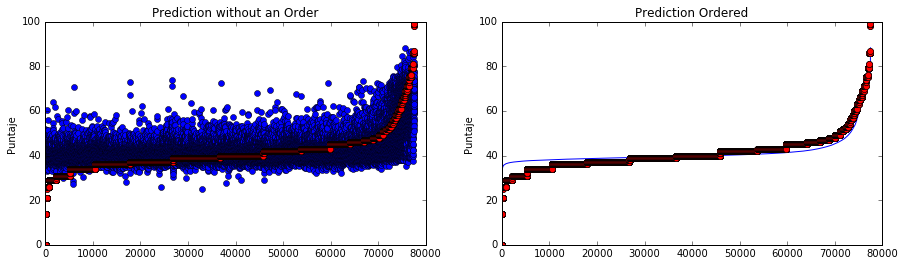

In [40]:
get_Poly_prediction(2, D_sorted, c)

In [ ]:
get_Poly_prediction(3, D_sorted, c)